# Lab 2: Basic data processing and evaluation

#### Introduction

In this lab we learn about Logistic Regression or what is sometimes reffered to as Logistic Classification.

- Data downloaded from Kaggle.com: data, [data dictionary](https://www.kaggle.com/uciml/sms-spam-collection-dataset)
- **Goal**: Predict whether a given text message is spam or not
- `spam.csv` is already in our repo, so there is no need to download the data from Kaggle


#### We will start by importing numpy, pandas, and matplotlib. (We will import other libraries/packages as we need them.) We will also read our spam csv file into a pandas dataframe.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Let's take a quick look at what we read in.

In [2]:
dataset = pd.read_csv('spam.csv', encoding='latin-1')
dataset.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


#### Data Cleaning - Drop Unneesary columns

In [3]:
# There are some unnesessary columns in the dataframe. Let's drop these columns.
dataset.drop('Unnamed: 2', axis=1, inplace=True)    # drop 1 column
dataset.head()

,v1,v2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN


**<font color="red" size=3>  The above code dropped the 'Unnamed: 2' column from the dataframe. Now write a code that drops multiple columns (Unnamed: 3 and Unnamed: 4) together. </font>**

In [4]:
# insert code here
dataset.drop(['Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)    # drop 1 column
dataset.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Rename columns with meaningful titles (text and label)

In [5]:
dataset.rename(columns={'v1':'label', 'v2':'text'}, inplace=True)
dataset.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


#### Now, we will change the spam and ham labels to 1's and 0's

In [6]:
dataset['label'] = dataset['label'].map({'spam': 1, 'ham': 0})
dataset.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


### Visualize data
#### Let's use some charts and graphs to visualize the data.

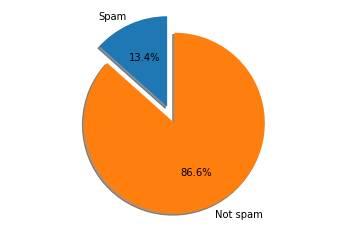

In [7]:
# generate a pie chart showing the distribution of the two classes
spam_size = dataset[dataset['label']==1].shape[0]
nonspam_size = dataset[dataset['label']==0].shape[0]
labels = 'Spam', 'Not spam'
sizes = [spam_size, nonspam_size]
explode = (0.2, 0)  # only "explode" the 1st slice (i.e. 'Spam')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

### Now, we will look at histograms for the length of the messages 

In [8]:
# Compute the length of each message in the dataframe at store it in a new column 'length'
dataset['length'] = dataset['text'].apply(len)
dataset.head()

,label,text,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


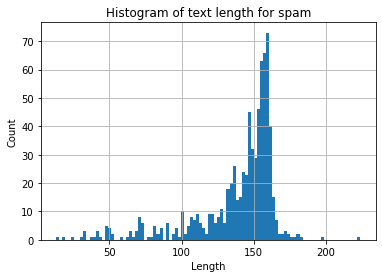

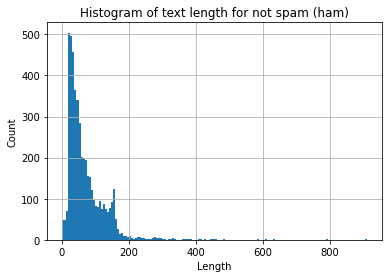

In [13]:
# histogram of length of the messages for the class 'spam'
dataset[dataset['label']==1].length.hist(bins=100)
plt.title('Histogram of text length for spam')
plt.xlabel('Length')
plt.ylabel('Count')
plt.show()

# histogram of length of the messages for the class 'ham' (not spam)
dataset[dataset['label']==0].length.hist(bins=150)
plt.title('Histogram of text length for not spam (ham)')
plt.xlabel('Length')
plt.ylabel('Count')
plt.show()

### Let's create a wordcloud to see the most frequently appearing words in the 'not spam' messages

<font color="red" size=3>  You may need to download the wordcloud library for this. Go to anaconda prompt and type "pip install wordcloud"  </font>

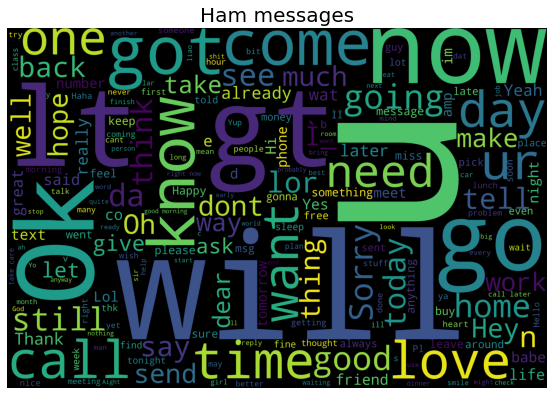

In [14]:
from wordcloud import WordCloud

text = ' '.join(dataset[dataset['label'] == 0]['text'].astype(str).tolist())
fig_wordcloud = WordCloud(width = 3000, height = 2000).generate(text)
plt.figure(figsize=(15,5), frameon=True)
plt.imshow(fig_wordcloud)  
plt.axis('off')
plt.tight_layout(pad=0)
plt.title("Ham messages", fontsize=20)
plt.show()

**<font color="red" size=3>Now create a wordcloud for 'spam' messages.</font>**

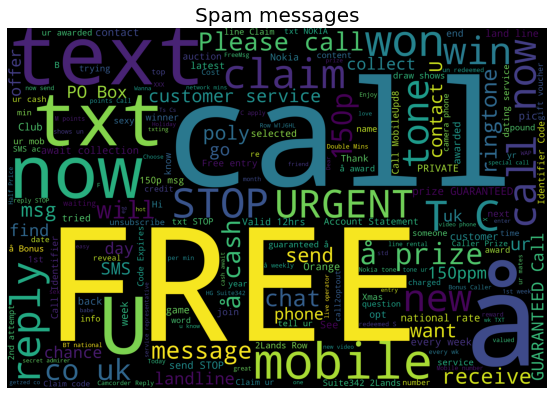

In [17]:
# insert code here
text = ' '.join(dataset[dataset['label'] == 1]['text'].astype(str).tolist())
fig_wordcloud = WordCloud(width = 3000, height = 2000).generate(text)
plt.figure(figsize=(15,5), frameon=True)
plt.imshow(fig_wordcloud)  
plt.axis('off')
plt.tight_layout(pad=0)
plt.title("Spam messages", fontsize=20)
plt.show()

## Data preprocessing and cleaning

#### Now we will process the texts to remove punctuations, convert to lowercase, remove [stopwords](https://www.meaningcloud.com/developer/resources/doc/models/1.0/models/stopwords), and [stem the words](https://www.geeksforgeeks.org/python-stemming-words-with-nltk/)

In [18]:
# Download the required libraries
import re   # regular expression library
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [20]:
# Create a list to contain cleaned and processed texts from all instances
corpus = []

for i in range(0, len(dataset)): # iterates through all texts
    # substitute anything that's not a letter (i.e.punctuations) with space
    text = re.sub('[^a-zA-Z]', ' ', dataset['text'][i])
    
    # convert to lowercase
    text = text.lower()
    
    # split the text into a list of individual words
    text = text.split()
    ps = PorterStemmer() # python library for stemming words
    
    # create list to store the stemmed words
    stemmedWord = []
    for word in text:
        if not word in set(stopwords.words('english')): # ignore stopwords
            stemmedWord.append(ps.stem(word))
    
    # join the words in stemmedWord list back together to form a string (with spaces between them)
    text = ' '.join(stemmedWord)
    
    # add the processed text to corpus 
    corpus.append(text)

In [21]:
print(corpus)

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat', 'ok lar joke wif u oni', 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli', 'u dun say earli hor u c alreadi say', 'nah think goe usf live around though', 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv', 'even brother like speak treat like aid patent', 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun', 'winner valu network custom select receivea prize reward claim call claim code kl valid hour', 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free', 'gonna home soon want talk stuff anymor tonight k cri enough today', 'six chanc win cash pound txt csh send cost p day day tsandc appli repli hl info', 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw', 'search right word thank breather promis wont 

## Feature extraction

### Creating the [Bag of Words](https://machinelearningmastery.com/gentle-introduction-bag-words-model/) model

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
# instantiate a model, and fit the processed text (corpus)
BoW_model = CountVectorizer()
X = BoW_model.fit_transform(corpus).toarray()

# Set y as the spam column
y = dataset['label'].values

### Splitting the dataset into the Training set and Test set

**<font color="red" size=3>Write the code to split the dataframe into train and test sets (chapter 2 of textbook train_test_split on page 53)</font>**

In [28]:
# insert code here
# import library for train_test_split
from sklearn.model_selection import train_test_split

# name the variables "X_train, X_test, y_train, and y_test"
X_train, X_test = train_test_split(X, test_size=0.2, random_state=25)
y_train, y_test = train_test_split(y, test_size=0.2, random_state=25)
# split training and test data into 80/20 split (i.e. test_size=0.2)


### Training the Naive Bayes model on the Training set

In [29]:
from sklearn.naive_bayes import GaussianNB
# create our Gaussian Naive Bayes model and fit it to our training data
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

### Predicting the Test set results

In [30]:
# predict the texts in X_test as spam or ham
y_pred = classifier.predict(X_test)
# Display a side by side comparison of the predicted label and true label
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 0]
 [1 1]
 ...
 [0 0]
 [0 0]
 [0 0]]


### Evaluating the model

In [56]:
# Compute model accuracy
from sklearn.metrics import accuracy_score
BoW_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the model with Bag of Words feature extraction: ", BoW_accuracy)

Accuracy of the model with Bag of Words feature extraction:  0.8556053811659193


In [57]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[812 138]
 [ 23 142]]


In [58]:
# producing a normalized Confusion Matrix
cm = confusion_matrix(y_test, y_pred, normalize='true')
print(cm)

[[0.85 0.15]
 [0.14 0.86]]


### Let's produce a nice looking confusion matrix

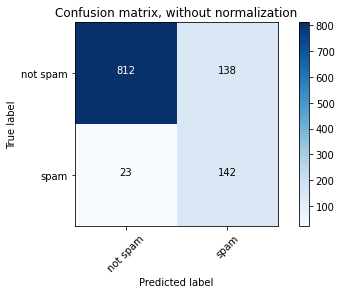

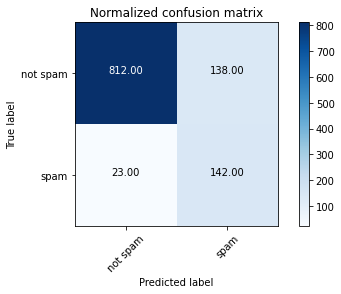

True positives: 142
True negatives: 812
False positives: 138
False negatives: 23


In [59]:
import itertools

# plot confusion matrix function
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
class_names = ['not spam','spam']
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

# We can get each value of the confusion matrix individually
# Let's assume the spam class is the positive class
print("True positives:",cnf_matrix[1,1])
print("True negatives:",cnf_matrix[0,0])
print("False positives:",cnf_matrix[0,1])
print("False negatives:",cnf_matrix[1,0])

**<font color="red" size=3>Now write the code to implement TF-IDF feature extraction method. Train with the GaussianNB model and calculate the accuracy and produce a confusion matrix.</font>**

Accuracy of the model with TF-IDF feature extraction:  0.8556053811659193


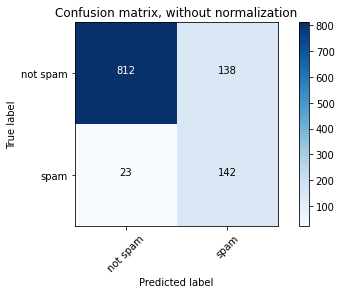

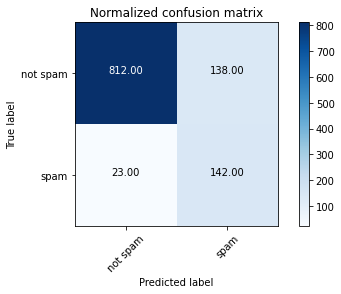

True positives: 142
True negatives: 812
False positives: 138
False negatives: 23


In [61]:
# insert code here
from sklearn.feature_extraction.text import TfidfVectorizer
# instantiate a model, and fit the processed text (corpus)
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus).toarray()

# Set y as the spam column
y = dataset['label'].values

# train_test_split
# split training and test data into 80/20 split (i.e. test_size=0.2)
X_train_1, X_test_1 = train_test_split(X, test_size=0.2, random_state=25)
y_train_1, y_test_1 = train_test_split(y, test_size=0.2, random_state=25)


# create our Gaussian Naive Bayes model and fit it to our training data
classifier = GaussianNB()
classifier.fit(X_train_1, y_train_1)

y_pred_1 = classifier.predict(X_test_1)


# Compute model accuracy
TF_IDF_accuracy = accuracy_score(y_test_1, y_pred_1)
print("Accuracy of the model with TF-IDF feature extraction: ", TF_IDF_accuracy)


# Compute confusion matrix
class_names = ['not spam','spam']
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

# We can get each value of the confusion matrix individually
# Let's assume the spam class is the positive class
print("True positives:",cnf_matrix[1,1])
print("True negatives:",cnf_matrix[0,0])
print("False positives:",cnf_matrix[0,1])
print("False negatives:",cnf_matrix[1,0])

**<font color="red" size=3>With features extracted from the TF-IDF method, implement a logistic regression model and calculate accuracy and create confusion matrix.</font>**

Accuracy of the logistic regression model with TF-IDF feature extraction:  0.9623318385650225


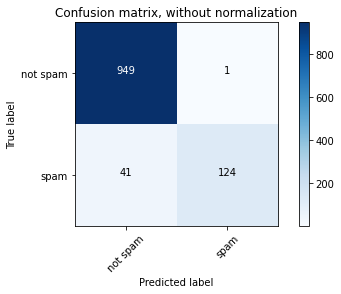

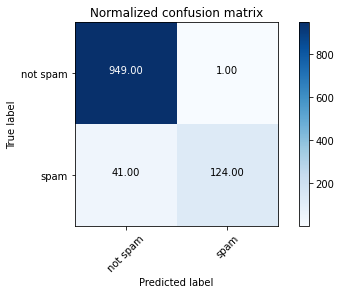

True positives: 124
True negatives: 949
False positives: 1
False negatives: 41


In [62]:
# write code to implement logistic regression here
# create our logistic regression model and fit it to our training data
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_1, y_train_1)

y_pred_2 = classifier.predict(X_test_1)


# Compute model accuracy
Logistic_regression_accuracy = accuracy_score(y_test_1, y_pred_2)
print("Accuracy of the logistic regression model with TF-IDF feature extraction: ", Logistic_regression_accuracy)


# Compute confusion matrix
class_names = ['not spam','spam']
cnf_matrix = confusion_matrix(y_test_1, y_pred_2)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

# We can get each value of the confusion matrix individually
# Let's assume the spam class is the positive class
print("True positives:",cnf_matrix[1,1])
print("True negatives:",cnf_matrix[0,0])
print("False positives:",cnf_matrix[0,1])
print("False negatives:",cnf_matrix[1,0])

**<font color="red" size=3>In the box below, write the code to generate the ROC curves for both the Naive Bayes and the  logistic regression classifier on the same graph.</font>**

In [85]:
def plot_roc_curve(fpr_1, tpr_1, color_1, label_1, fpr_2, tpr_2, color_2, label_2):
    plt.plot(fpr_1, tpr_1, linewidth=2, label=label_1, color=color_1)
    plt.plot(fpr_1, tpr_2, linewidth=2, label=label_2, color=color_2)
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()


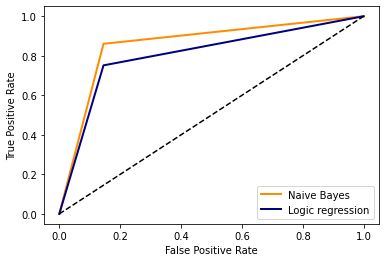

In [91]:
from sklearn.metrics import roc_curve

# write the ROC curve code here
# Compute ROC curve and ROC area for each class
fpr_2, tpr_2, thresholds = roc_curve(y_test, y_pred_2)
fpr_1, tpr_1, threshold = roc_curve(y_test, y_pred_1)
plot_roc_curve(fpr_1, tpr_1, "darkorange", "Naive Bayes", fpr_2, tpr_2, "navy", "Logic regression")
plt.show()

**<font color="red" size=3>In the box below, write the code to compute and print the AUC for both curves.</font>**

In [94]:
from sklearn.metrics import auc

# write the AUC code here
print("AUC for Naive Bays: ", auc(fpr_1, tpr_1))
print("AUC for Logic Regression: ", auc(fpr_2, tpr_2))

AUC for Naive Bays:  0.8576714513556619
AUC for Logic Regression:  0.875231259968102


**<font color="red" size=3>From Chapter 3 of the book, implement the given example code that uses the MNIST dataset (at least through page 93)</font>**

In [ ]:
# Implement example code here
from sklearn.datasets import fetch_openml
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.linear_model import SDGClassifier
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()
X, y = mnist["data"], mnist["target"]
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap='binary')
plt.axis("off")
plt.show()

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

sdg_clf.predict([some_digit])